In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
sns.set_style('darkgrid') # darkgrid, white grid, dark, white and ticks
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('font', size=13)          # controls default text sizes

In [3]:
steam = pd.read_csv("Cleaned Data/clean_data.csv")

In [4]:
steam.head()

,name,steam_appid,required_age,is_free,about_the_game,short_description,developers,platforms,release_date,positive,negative,owners,average_forever,median_forever,languages,tags
0,Counter-Strike,10,0.0,False,Play the world's number 1 online action game. ...,Play the world's number 1 online action game. ...,['Valve'],"{'windows': True, 'mac': True, 'linux': True}","{'coming_soon': False, 'date': '1 Nov, 2000'}",124534,3339,10000000-20000000,17612,317,"English, French, German, Italian, Spanish - Sp...",Action;FPS;Multiplayer
1,Team Fortress Classic,20,0.0,False,One of the most popular online action games of...,One of the most popular online action games of...,['Valve'],"{'windows': True, 'mac': True, 'linux': True}","{'coming_soon': False, 'date': '1 Apr, 1999'}",3318,633,5000000-10000000,277,62,"English, French, German, Italian, Spanish - Sp...",Action;FPS;Multiplayer
2,Day of Defeat,30,0.0,False,Enlist in an intense brand of Axis vs. Allied ...,Enlist in an intense brand of Axis vs. Allied ...,['Valve'],"{'windows': True, 'mac': True, 'linux': True}","{'coming_soon': False, 'date': '1 May, 2003'}",3416,398,5000000-10000000,187,34,"English, French, German, Italian, Spanish - Spain",FPS;World War II;Multiplayer
3,Deathmatch Classic,40,0.0,False,Enjoy fast-paced multiplayer gaming with Death...,Enjoy fast-paced multiplayer gaming with Death...,['Valve'],"{'windows': True, 'mac': True, 'linux': True}","{'coming_soon': False, 'date': '1 Jun, 2001'}",1273,267,5000000-10000000,258,184,"English, French, German, Italian, Spanish - Sp...",Action;FPS;Multiplayer
4,Half-Life: Opposing Force,50,0.0,False,Return to the Black Mesa Research Facility as ...,Return to the Black Mesa Research Facility as ...,['Gearbox Software'],"{'windows': True, 'mac': True, 'linux': True}","{'coming_soon': False, 'date': '1 Nov, 1999'}",5250,288,5000000-10000000,624,415,"English, French, German, Korean",FPS;Action;Sci-fi


In [5]:
from wordcloud import WordCloud, STOPWORDS

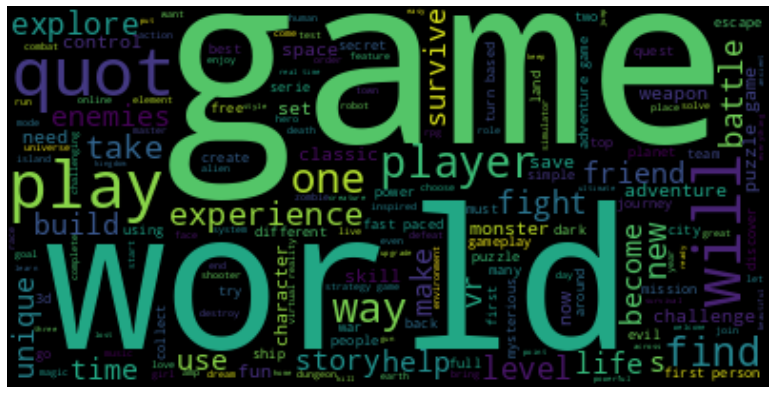

In [6]:
#filter the df to one candidate, and create a list of responses from them
text = steam.short_description.tolist() 

# join the list and lowercase all the words
text = ' '.join(text).lower()

#create the wordcloud object
wordcloud = WordCloud(stopwords = STOPWORDS, collocations=True).generate(text)

#plot the wordcloud object
plt.figure(figsize=(14,7))
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()

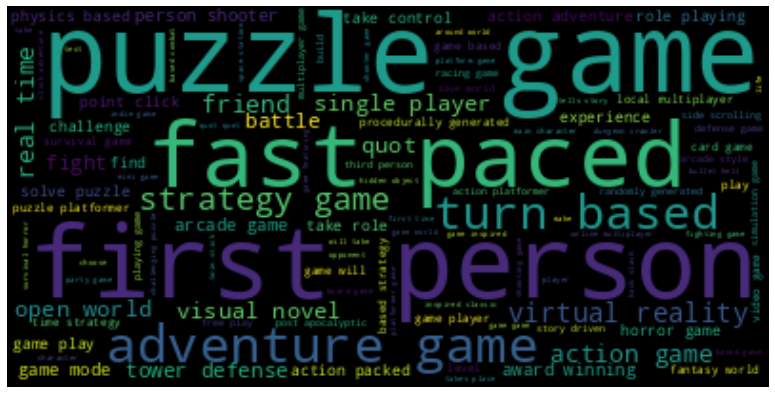

In [7]:
# WordCloud needs one string of text to generate the wordcloud image, 
# so we will filter and combine the text of one candidate

#filter the df to one candidate, and create a list of responses from them
text = steam.short_description.tolist()
# join the list and lowercase all the words
text = ' '.join(text).lower()
#create the wordcloud object
wordcloud = WordCloud(stopwords = STOPWORDS,
                        collocations=True,
                        min_word_length =4,
                        collocation_threshold=3).generate(text)

text1_dict = dict(
    sorted(
        wordcloud.process_text(text).items(),
        reverse=True,
        key=lambda item: item[1],
    )
)

plt.figure(figsize=(14,7))
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()

In [8]:
steam["is_free"] = steam["is_free"].astype(int)

In [9]:
steam["is_free"] = steam["is_free"].replace([1, 0], ['Free to Play', 'Pay to Play'])

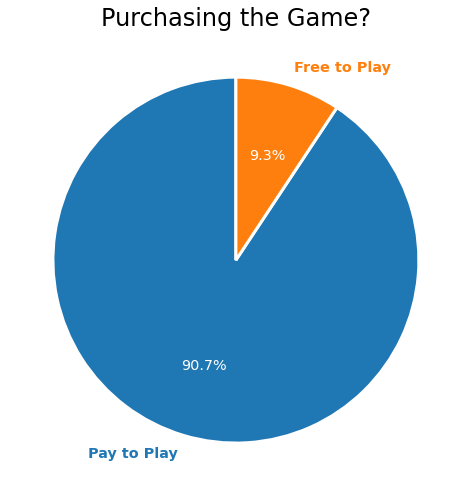

In [10]:
fig, ax = plt.subplots(figsize=(14, 7))
s = steam["is_free"].value_counts()
patches, texts, pcts = ax.pie(s, labels=s.index, autopct='%.1f%%',
                                wedgeprops={'linewidth': 3.0,'edgecolor': 'white'},
                                textprops={'size': 'x-large'},
                                startangle=90)
# For each wedge, set the corresponding text label color to the wedge's
# face color.
for i, patch in enumerate(patches):
    texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='white')
plt.setp(texts, fontweight=600)
ax.title.set_color('black')
ax.set_title('Purchasing the Game?', fontsize=24)
plt.tight_layout()


In [12]:
steam['bool_age'] = steam["required_age"].astype('bool')

In [14]:
steam['bool_age'] = steam['bool_age'].astype(int)
steam['bool_age'] = steam['bool_age'].replace([1, 0], ['Age Restricted', 'No Age Restriction'])

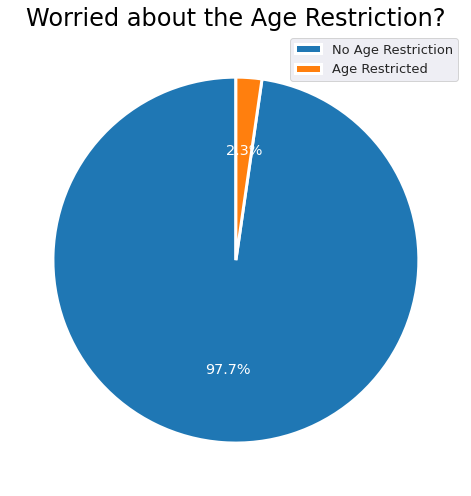

In [15]:
fig, ax = plt.subplots(figsize=(14, 7))
s = steam['bool_age'].value_counts()
patches, texts, pcts = ax.pie(s, autopct='%.1f%%',
                                wedgeprops={'linewidth': 3.0,'edgecolor': 'white'},
                                textprops={'size': 'x-large'},
                                startangle=90)
# For each wedge, set the corresponding text label color to the wedge's
# face color.
for i, patch in enumerate(patches):
    texts[i].set_color(patch.get_facecolor())
ax.yaxis.set_visible(False)
plt.setp(pcts, color='white')
plt.setp(texts, fontweight=600)
plt.legend(patches, s.index, loc="best")
ax.title.set_color('black')
ax.set_title('Worried about the Age Restriction?', fontsize=24)
plt.tight_layout()


In [43]:
steam.developers = steam.developers.str[2:-2]

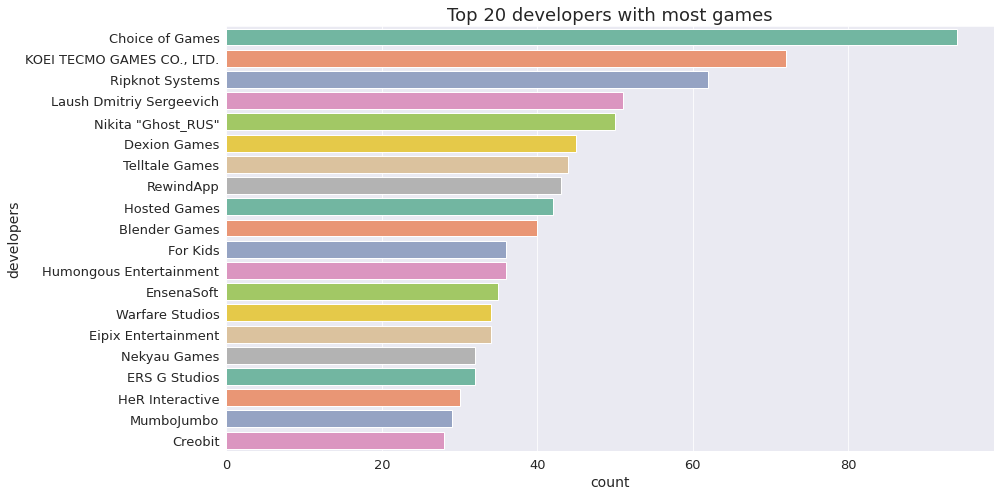

In [44]:
plt.figure(figsize=(14,7), tight_layout=True)
top=20
plt.title(f'Top {top} developers with most games')

sns.countplot(y="developers", data=steam, order=steam.developers.value_counts().iloc[:top].index, palette='Set2')
plt.show()